In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
df = pd.read_csv('Train_newColumns.csv')

In [4]:
from pandas.plotting import scatter_matrix

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   int64 
 2   BusinessTravel            1013 non-null   object
 3   Department                1013 non-null   object
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   object
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   object
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   object
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

In [6]:
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [7]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    1013 non-null   int64
 1   DistanceFromHome       1013 non-null   int64
 2   MonthlyIncome          1013 non-null   int64
 3   NumCompaniesWorked     1013 non-null   int64
 4   PercentSalaryHike      1013 non-null   int64
 5   TotalWorkingYears      1013 non-null   int64
 6   TrainingTimesLastYear  1013 non-null   int64
 7   YearsAtCompany         1013 non-null   int64
 8   YearsWithCurrManager   1013 non-null   int64
 9   Stagnation             1013 non-null   int64
dtypes: int64(10)
memory usage: 79.3 KB


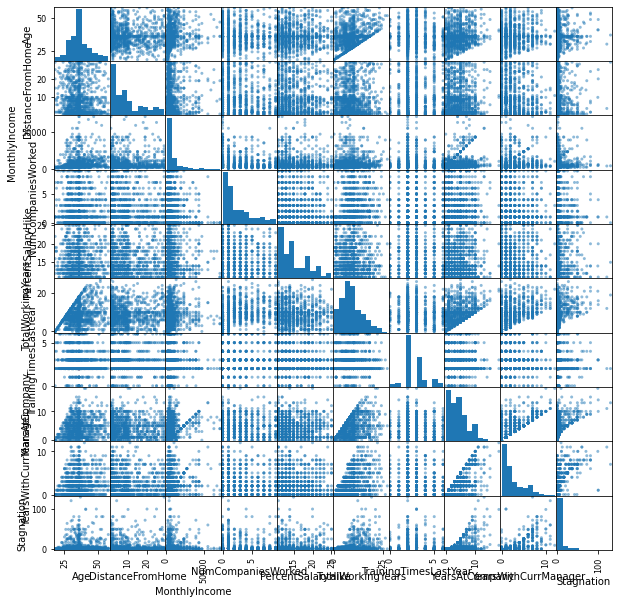

In [51]:
scatter_matrix(dfnew, figsize=(10, 10))
plt.show()

In [117]:
scaler = StandardScaler()
df_zscore = scaler.fit_transform(dfnew.values)

In [118]:
df_zscore

array([[ 1.27893205e-01, -6.40171953e-01, -5.40066944e-01, ...,
         2.08827100e-01,  1.77790985e-01, -1.86589741e-01],
       [-8.89912957e-04, -5.15052488e-01,  6.57039138e-02, ...,
        -9.99931224e-02,  5.78909621e-01, -4.49384884e-01],
       [-8.89912957e-04,  2.35664304e-01, -4.19463652e-01, ...,
         5.17647322e-01, -1.02556492e+00, -4.49384884e-01],
       ...,
       [ 6.43025677e-01, -8.90410884e-01,  4.06192160e-02, ...,
        -4.08813345e-01, -1.02556492e+00, -4.49384884e-01],
       [-8.89912957e-04, -2.64813557e-01, -1.24447932e-01, ...,
        -1.02645379e+00, -1.02556492e+00, -4.49384884e-01],
       [ 2.56676323e-01,  3.60783769e-01, -3.54046695e-01, ...,
        -1.02645379e+00, -1.02556492e+00, -4.49384884e-01]])

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [116]:
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=100)
kmeans.fit(df_zscore)

KMeans(max_iter=100, n_clusters=5, n_init=20)

In [109]:
kmeans.labels_

array([12,  1, 11, ..., 18, 13, 13], dtype=int32)

In [110]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24], dtype=int32),
 array([45, 49, 24, 47, 28, 78, 38, 69, 16, 25, 19, 50, 58, 81, 41, 24, 24,
        49, 47, 30, 27, 19, 40, 25, 60]))

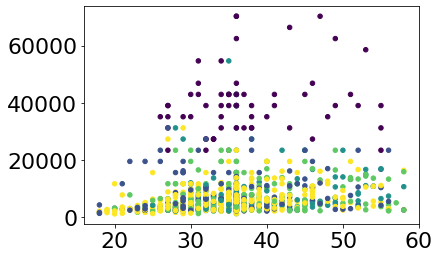

In [113]:
plt.scatter(dfnew['Age'], dfnew['MonthlyIncome'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [40]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(df_zscore, kmeans.labels_))

SSE 5388.0676162946
Silhouette 0.12159243392153539


In [41]:
#con i k.means dobbiamo determinare il miglior numero di cluster attraverso il SSE
sse_list = list()
#da due cluster a 50+1 perche partiamo  da 0
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_zscore)
    #calcoliamo il sse e lo appendiamo in una lista per plottarla
    sse = kmeans.inertia_
    sse_list.append(sse)

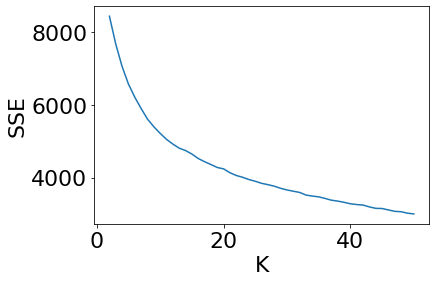

In [42]:
#possiamo scelgiere il valore migliore vedendo il primo punto in cui si ottiene il minor SSE
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [53]:
dfnuovo = dfnew.drop(columns=['DistanceFromHome','NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear'])

In [54]:
dfnuovo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1013 non-null   int64
 1   MonthlyIncome         1013 non-null   int64
 2   TotalWorkingYears     1013 non-null   int64
 3   YearsAtCompany        1013 non-null   int64
 4   YearsWithCurrManager  1013 non-null   int64
 5   Stagnation            1013 non-null   int64
dtypes: int64(6)
memory usage: 47.6 KB


In [119]:
df_zscore_secondo = scaler.fit_transform(dfnuovo.values)

In [120]:
df_zscore_secondo

array([[ 1.27893205e-01, -5.40066944e-01,  1.88603601e-01,
         2.08827100e-01,  1.77790985e-01, -1.86589741e-01],
       [-8.89912957e-04,  6.57039138e-02,  1.69743241e+00,
        -9.99931224e-02,  5.78909621e-01, -4.49384884e-01],
       [-8.89912957e-04, -4.19463652e-01,  1.13162160e+00,
         5.17647322e-01, -1.02556492e+00, -4.49384884e-01],
       ...,
       [ 6.43025677e-01,  4.06192160e-02, -1.13162160e+00,
        -4.08813345e-01, -1.02556492e+00, -4.49384884e-01],
       [-8.89912957e-04, -1.24447932e-01, -1.50882881e+00,
        -1.02645379e+00, -1.02556492e+00, -4.49384884e-01],
       [ 2.56676323e-01, -3.54046695e-01, -1.50882881e+00,
        -1.02645379e+00, -1.02556492e+00, -4.49384884e-01]])

In [127]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=400)
kmeans.fit(df_zscore_secondo)

KMeans(max_iter=400, n_clusters=3)

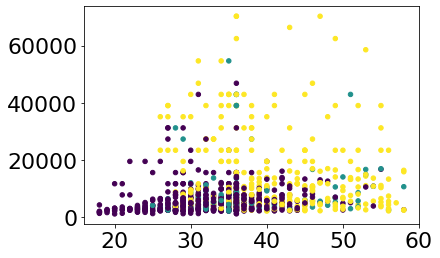

In [128]:
plt.scatter(dfnew['Age'], dfnew['MonthlyIncome'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

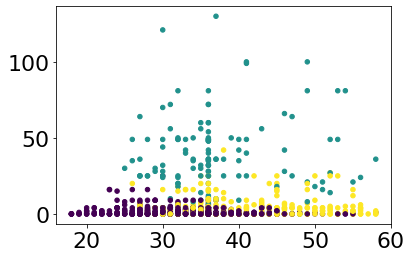

In [129]:
plt.scatter(dfnew['Age'], dfnew['Stagnation'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

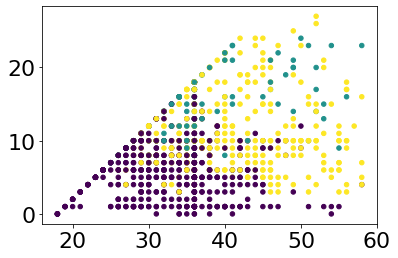

In [130]:
plt.scatter(dfnew['Age'], dfnew['TotalWorkingYears'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

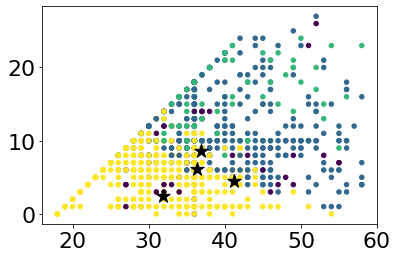

In [87]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(dfnuovo['Age'], dfnuovo['TotalWorkingYears'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [131]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 3708.11927967046
Silhouette 0.23537699003772633


In [100]:
scala = MinMaxScaler()
X = scala.fit_transform(dfnuovo.values)

In [102]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3)

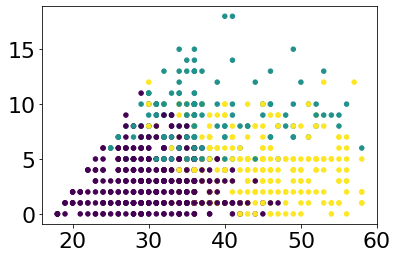

In [106]:
plt.scatter(dfnuovo['Age'], dfnuovo['YearsAtCompany'], c=kmeans.labels_, 
            s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()